CSC3310 — Program #2 — Benchmarking Insertion and Selection Sorts

David Litton and Eleazar Miranda

CSC 3310

Mar 1, 2024

# Implementation

## Selection Sort

In [1]:
def selectionSort(input_arr):
    n = len(input_arr)
    for i in range(n-1):
        min_index = i
        for j in range(i + 1, n):
            if input_arr[j] < input_arr[min_index]:
                min_index = j
        input_arr[i], input_arr[min_index] = input_arr[min_index], input_arr[i]

    return input_arr
        
        


## Insertion Sort

In [2]:
def insertionSort(input_arr):
    for i in range(1, len(input_arr)):
        key = input_arr[i]
        j = i-1
        while j >= 0 and key < input_arr[j] :
                input_arr[j + 1] = input_arr[j]
                j -= 1
        input_arr[j + 1] = key
    
    return input_arr

# Validation and Verification

In [3]:
sample_1 = [5, 3, 4, 2, 1]
sample_2 = [1, 2, 3, 4, 5]
sample_3 = [1, 1, 1, 1, 1]
sample_4 = [5, 1, 1, 1, 1]

output_1 = [1, 2, 3, 4, 5]
output_2 = [1, 2, 3, 4, 5]
output_3 = [1, 1, 1, 1, 1]
output_4 = [1, 1, 1, 1, 5]

all_sample_test_sets = [sample_1, sample_2, sample_3, sample_4]
all_expected_outputs = [output_1, output_2, output_3, output_4]

num_tests = 4

In [4]:
def validation_test():
    for test_num in range(0, num_tests):
        print("Testing using sample_" + str(test_num + 1))
        print(" - input:  " + str(all_sample_test_sets[test_num]))
        print(" - output: " + str(all_expected_outputs[test_num]))
        
        selection_out = selectionSort(all_sample_test_sets[test_num])
        insertion_out = insertionSort(all_sample_test_sets[test_num])
        
        
        output_message = ""
        error_msg = "Invalid output:\n"
        if (selection_out == all_expected_outputs[test_num]):
            output_message += "selection sort: PASSED | "
        else:
            output_message += "selection sort: FAILED | "
            error_msg += "selection sort: " + str(selection_out) + "\n"
            
        if (insertion_out == all_expected_outputs[test_num]):
            output_message += "insertion sort: PASSED"
        else:
            output_message += "insertion sort: FAILED"
            error_msg += "insertion sort: " + str(selection_out)
            
        print(output_message)
        print(error_msg + "\n")

In [5]:
validation_test()

Testing using sample_1
 - input:  [5, 3, 4, 2, 1]
 - output: [1, 2, 3, 4, 5]
selection sort: PASSED | insertion sort: PASSED
Invalid output:


Testing using sample_2
 - input:  [1, 2, 3, 4, 5]
 - output: [1, 2, 3, 4, 5]
selection sort: PASSED | insertion sort: PASSED
Invalid output:


Testing using sample_3
 - input:  [1, 1, 1, 1, 1]
 - output: [1, 1, 1, 1, 1]
selection sort: PASSED | insertion sort: PASSED
Invalid output:


Testing using sample_4
 - input:  [5, 1, 1, 1, 1]
 - output: [1, 1, 1, 1, 5]
selection sort: PASSED | insertion sort: PASSED
Invalid output:




# Benchmarking

In [6]:
import time
import copy

def benchmark(sorting_algorithm, input_list):
 
    original_list = copy.deepcopy(input_list)  # Make a separate copy for each trial
    start_time = time.perf_counter()

    # Benchmark loop
    for _ in range(10):  # Run it 10 times to get an average
        sorting_algorithm(copy.deepcopy(original_list))

    end_time = time.perf_counter()
    elapsed_time = end_time - start_time # The total time of 100 runs
    avg_time = elapsed_time / 10

    print ("Average time to complete " + sorting_algorithm.__name__  + " " + str(avg_time) + " seconds for a list of size: " + str(len(input_list)))
    
    return avg_time
   



In [7]:
import random

# Generating a list of 100 random numbers
list_10_rand = [random.randint(1, 1000) for _ in range(10)]
list_100_rand =  [random.randint(1, 1000) for _ in range(100)]
list_1000_rand =  [random.randint(1, 1000) for _ in range(1000)]
list_10000_rand = [random.randint(1, 1000) for _ in range(10000)]
list_20000_rand = [random.randint(1, 1000) for _ in range(20000)]
list_10_reverse = sorted(range(10), reverse=True)
list_100_reverse = sorted(range(100), reverse=True)
list_1000_reverse  = sorted(range(1000), reverse=True)
list_10000_reverse  = sorted(range(10000), reverse=True)
list_20000_reverse  = sorted(range(20000), reverse=True)
list_10_sorted = sorted(range(10))
list_100_sorted = sorted(range(100))
list_1000_sorted  = sorted(range(1000))
list_10000_sorted  = sorted(range(10000))
list_20000_sorted  = sorted(range(20000))






In [8]:
# Random SOrted List (average case)
avg_selectionSort_list = []
avg_selectionSort_list.append(benchmark(selectionSort,list_10_rand))
avg_selectionSort_list.append(benchmark(selectionSort,list_100_rand))
avg_selectionSort_list.append(benchmark(selectionSort,list_1000_rand))
avg_selectionSort_list.append(benchmark(selectionSort,list_10000_rand))
avg_selectionSort_list.append(benchmark(selectionSort,list_20000_rand))

avg_insertionSort_list = []
avg_insertionSort_list.append(benchmark(insertionSort,list_10_rand))
avg_insertionSort_list.append(benchmark(insertionSort,list_100_rand))
avg_insertionSort_list.append(benchmark(insertionSort,list_1000_rand))
avg_insertionSort_list.append(benchmark(insertionSort,list_10000_rand))
avg_insertionSort_list.append(benchmark(insertionSort,list_20000_rand))

Average time to complete selectionSort 4.229000005580019e-05 seconds for a list of size: 10
Average time to complete selectionSort 0.000677929999983462 seconds for a list of size: 100
Average time to complete selectionSort 0.053238369999962745 seconds for a list of size: 1000
Average time to complete selectionSort 5.166900530000021 seconds for a list of size: 10000
Average time to complete selectionSort 21.266561980000006 seconds for a list of size: 20000
Average time to complete insertionSort 2.0200000108161476e-05 seconds for a list of size: 10
Average time to complete insertionSort 0.0005242100000032224 seconds for a list of size: 100
Average time to complete insertionSort 0.05123453000014706 seconds for a list of size: 1000
Average time to complete insertionSort 2.8672054699998624 seconds for a list of size: 10000
Average time to complete insertionSort 16.00048623999992 seconds for a list of size: 20000


In [9]:
# Random Reverse List (worst case)
worst_selectionSort_list = []
worst_selectionSort_list.append(benchmark(selectionSort,list_10_reverse))
worst_selectionSort_list.append(benchmark(selectionSort,list_100_reverse))
worst_selectionSort_list.append(benchmark(selectionSort,list_1000_reverse))
worst_selectionSort_list.append(benchmark(selectionSort,list_10000_reverse))
worst_selectionSort_list.append(benchmark(selectionSort,list_20000_reverse))

worst_insertionSort_list = []
worst_insertionSort_list.append(benchmark(insertionSort,list_10_reverse))
worst_insertionSort_list.append(benchmark(insertionSort,list_100_reverse))
worst_insertionSort_list.append(benchmark(insertionSort,list_1000_reverse))
worst_insertionSort_list.append(benchmark(insertionSort,list_10000_reverse))
worst_insertionSort_list.append(benchmark(insertionSort,list_20000_reverse))

Average time to complete selectionSort 2.227000004495494e-05 seconds for a list of size: 10
Average time to complete selectionSort 0.0006018299998686416 seconds for a list of size: 100
Average time to complete selectionSort 0.057853570000042966 seconds for a list of size: 1000
Average time to complete selectionSort 5.680002950000016 seconds for a list of size: 10000
Average time to complete selectionSort 22.53530380000011 seconds for a list of size: 20000
Average time to complete insertionSort 1.5119999989110511e-05 seconds for a list of size: 10
Average time to complete insertionSort 0.0006445699998948839 seconds for a list of size: 100
Average time to complete insertionSort 0.0708604600000399 seconds for a list of size: 1000
Average time to complete insertionSort 7.580340919999981 seconds for a list of size: 10000
Average time to complete insertionSort 30.442335450000247 seconds for a list of size: 20000


In [10]:
#Already sorted lists (best case)
best_selectionSort_list = []
best_selectionSort_list.append(benchmark(selectionSort,list_10_sorted))
best_selectionSort_list.append(benchmark(selectionSort,list_100_sorted))
best_selectionSort_list.append(benchmark(selectionSort,list_1000_sorted))
best_selectionSort_list.append(benchmark(selectionSort,list_10000_sorted))
best_selectionSort_list.append(benchmark(selectionSort,list_20000_sorted))

best_insertionSort_list = []
best_insertionSort_list.append(benchmark(insertionSort,list_10_sorted))
best_insertionSort_list.append(benchmark(insertionSort,list_100_sorted))
best_insertionSort_list.append(benchmark(insertionSort,list_1000_sorted))
best_insertionSort_list.append(benchmark(insertionSort,list_10000_sorted))
best_insertionSort_list.append(benchmark(insertionSort,list_20000_sorted))

Average time to complete selectionSort 1.652999999350868e-05 seconds for a list of size: 10
Average time to complete selectionSort 0.00037950999976601454 seconds for a list of size: 100
Average time to complete selectionSort 0.04128237000004446 seconds for a list of size: 1000
Average time to complete selectionSort 3.7325463799999854 seconds for a list of size: 10000
Average time to complete selectionSort 15.109214539999812 seconds for a list of size: 20000
Average time to complete insertionSort 9.71000008576084e-06 seconds for a list of size: 10
Average time to complete insertionSort 6.452999987232033e-05 seconds for a list of size: 100
Average time to complete insertionSort 0.0006486999998742248 seconds for a list of size: 1000
Average time to complete insertionSort 0.006646339999861084 seconds for a list of size: 10000
Average time to complete insertionSort 0.012956370000028982 seconds for a list of size: 20000


In [14]:
import matplotlib.pyplot as plt

list_sizes = [10, 100, 1000, 10000, 20000]

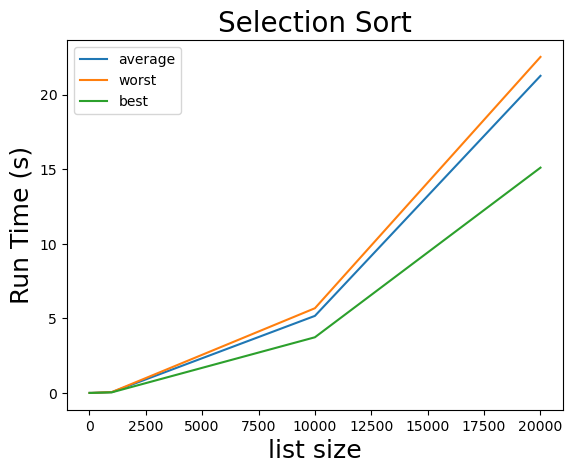

In [15]:
# plot all selection sort
plt.plot(list_sizes, avg_selectionSort_list, label="average")
plt.plot(list_sizes, worst_selectionSort_list, label="worst")
plt.plot(list_sizes, best_selectionSort_list, label="best")
plt.xlabel("list size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Selection Sort", fontsize=20)
plt.legend()

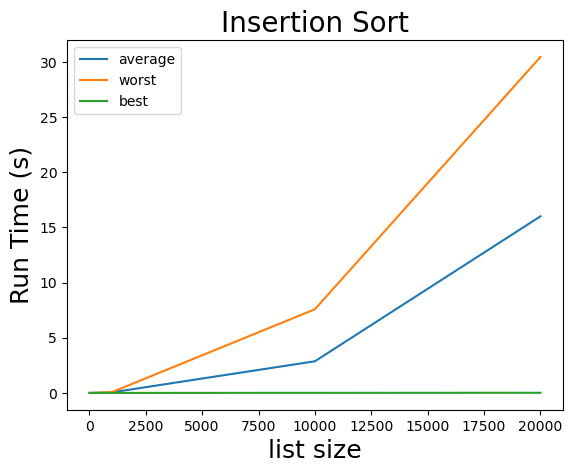

In [16]:
# plot all insertion sort
plt.plot(list_sizes, avg_insertionSort_list, label="average")
plt.plot(list_sizes, worst_insertionSort_list, label="worst")
plt.plot(list_sizes, best_insertionSort_list, label="best")
plt.xlabel("list size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Insertion Sort", fontsize=20)
plt.legend()

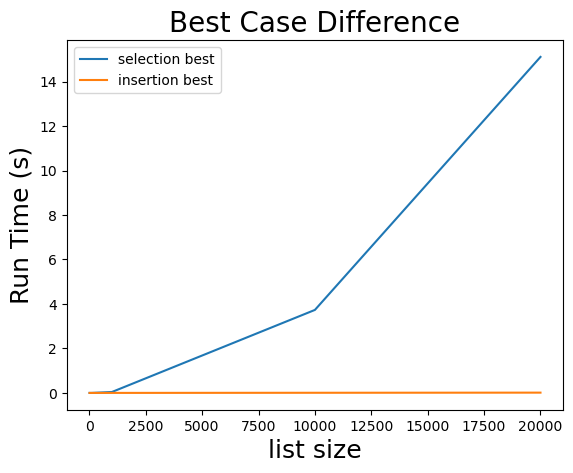

In [20]:
# plot best
plt.plot(list_sizes, best_selectionSort_list, label="selection best")
plt.plot(list_sizes, best_insertionSort_list, label="insertion best")
plt.xlabel("list size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Best Case Difference", fontsize=20)
plt.legend()

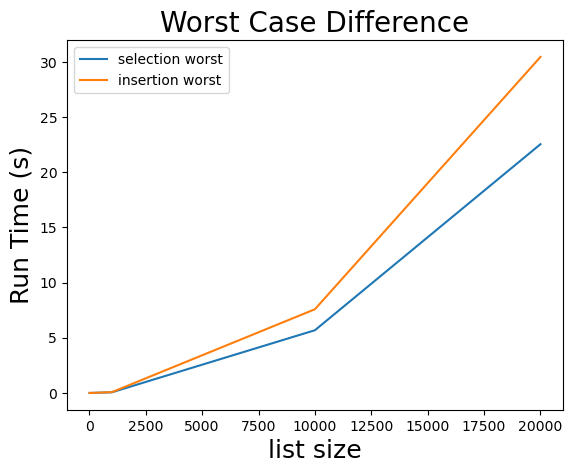

In [22]:
# plot worst
plt.plot(list_sizes, worst_selectionSort_list, label="selection worst")
plt.plot(list_sizes, worst_insertionSort_list, label="insertion worst")
plt.xlabel("list size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Worst Case Difference", fontsize=20)
plt.legend()

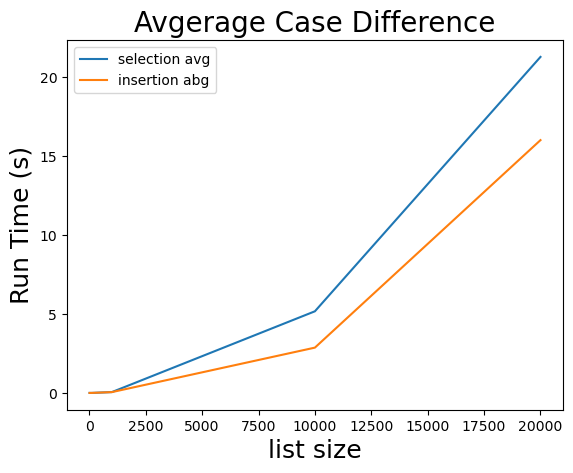

In [21]:
# plot average
plt.plot(list_sizes, avg_selectionSort_list, label="selection avg")
plt.plot(list_sizes, avg_insertionSort_list, label="insertion abg")
plt.xlabel("list size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Avgerage Case Difference", fontsize=20)
plt.legend()

# Analysis

# Reflection